# Quantify intra TAD contacts

In [1]:
import pandas as pd
import cooler
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
downsample_dir = Path(
    "/tscc/projects/ps-epigen/users/biy022/scmethylhic/human_hippocampus/"
    "snm3c/Combined/hic/downsampled/"
)
tad_dir = Path("/tscc/projects/ps-renlab2/sel041/scmethylhic/human_hippocampus/concat/hic/celltype/")

In [3]:
def load_datasets(subclass, resolution=25000):
    result = dict()

    for group in ["20-40", "40-60", "60-80", "80-100"]:
        result[group] = cooler.Cooler(
            str(downsample_dir / subclass / f"{subclass}_{group}.mcool::/resolutions/{resolution}"))
    return result

## Test with Oligo

In [4]:
subclass = "Oligo"
curr_datasets = load_datasets(subclass)

In [5]:
curr_tad = pd.read_csv(
    tad_dir / f"human_aging_{subclass}_psueobulk_domain_filtered.bed",
    header=0, sep=","
)

In [6]:
curr_pd_dict = dict()
for group in curr_datasets:
    tmp_counts = list()
    for i in range(0, curr_tad.shape[0]):
        tmp_matrix = np.triu(curr_datasets[group].matrix(balance=False).fetch(curr_tad.iloc[i]))
        tmp_counts.append(np.sum(tmp_matrix) / np.square(tmp_matrix.shape[0]))
    curr_pd_dict[group] = tmp_counts

In [7]:
print(np.sum(np.triu(curr_datasets["20-40"].matrix(balance=False)[:])))
print(np.sum(np.triu(curr_datasets["40-60"].matrix(balance=False)[:])))
print(np.sum(np.triu(curr_datasets["60-80"].matrix(balance=False)[:])))
print(np.sum(np.triu(curr_datasets["80-100"].matrix(balance=False)[:])))

258529829
258727256
258136845
258308371


In [8]:
curr_pd = pd.DataFrame(curr_pd_dict)

In [9]:
curr_pd["2vs1"] = curr_pd["40-60"] / curr_pd["20-40"]
curr_pd["3vs1"] = curr_pd["60-80"] / curr_pd["20-40"]
curr_pd["4vs1"] = curr_pd["80-100"] / curr_pd["20-40"]

In [10]:
curr_pd_count = pd.melt(curr_pd.iloc[:, 0:4], var_name="age", value_name="contacts")
curr_pd_fold = pd.melt(curr_pd.iloc[:, 4:], var_name="comparison", value_name="contacts")

In [11]:
age_colors = {
    "20-40": "#1B9E77",
    "40-60": "#CCCD66",
    "60-80": "#7570B3",
    "80-100": "#E7298A"
}
comparison_colors = {
    "2vs1": "#CCCD66",
    "3vs1": "#7570B3",
    "4vs1": "#E7298A"
}

In [12]:
figure_dir = Path(
    "/tscc/projects/ps-epigen/users/biy022/scmethylhic/"
    "human_hippocampus/snm3c/Combined/hic/figures/downsample_intra_TAD_contacts"
)

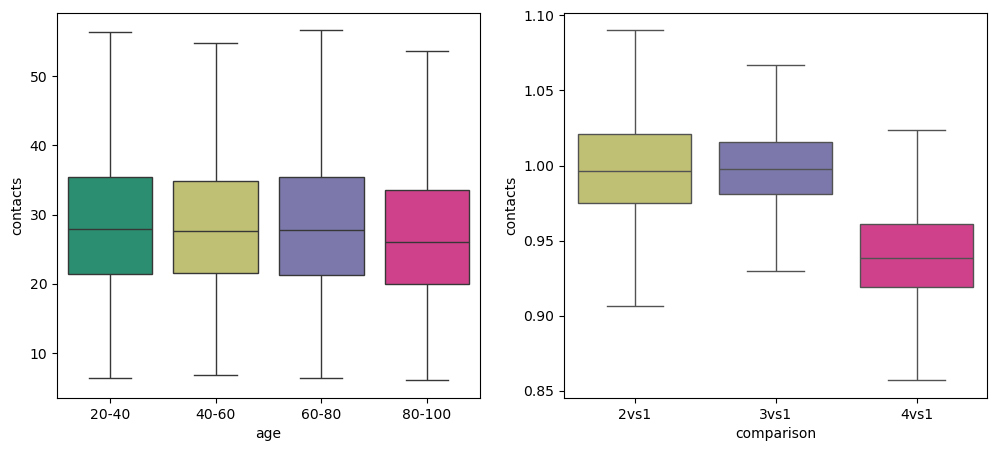

In [15]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(5)

# sns.violinplot(
#     data=curr_pd_count, x="age", y="contacts", hue="age", 
#     ax=axs[0], palette=age_colors, inner=None
# )
sns.boxplot(
    data=curr_pd_count, x="age", y="contacts", hue="age",
    ax=axs[0], width=0.8, palette=age_colors, boxprops={"zorder": 2},
    showfliers=False
)

# sns.violinplot(
#     data=curr_pd_fold, x="comparison", y="contacts", hue="comparison", 
#     ax=axs[1], palette=comparison_colors, inner=None
# )
sns.boxplot(
    data=curr_pd_fold, x="comparison", y="contacts", hue="comparison",
    ax=axs[1], width=0.8, palette=comparison_colors, boxprops={"zorder": 2},
    showfliers=False
)
fig.savefig(
    str(figure_dir / (subclass + ".pdf")),
    dpi=200,
    format="pdf"
)

In [19]:
curr_pd_fold["subclass"] = "Oligo"
curr_pd_count["subclass"] = "Oligo"

## Write a function

In [24]:
figure_dir = Path(
    "/tscc/projects/ps-epigen/users/biy022/scmethylhic/"
    "human_hippocampus/snm3c/Combined/hic/figures/downsample_intra_TAD_contacts"
)

In [25]:
def summarize_intra_tad_contacts(subclass):
    curr_datasets = load_datasets(subclass)
    curr_tad = pd.read_csv(
        tad_dir / f"human_aging_{subclass}_psueobulk_domain_filtered.bed",
        header=0, sep=","
    )

    curr_pd_dict = dict()
    for group in curr_datasets:
        tmp_counts = list()
        for i in range(0, curr_tad.shape[0]):
            tmp_matrix = np.triu(curr_datasets[group].matrix(balance=False).fetch(curr_tad.iloc[i]))
            tmp_counts.append(np.sum(tmp_matrix) / np.square(tmp_matrix.shape[0]))
        curr_pd_dict[group] = tmp_counts

    print(np.sum(np.triu(curr_datasets["20-40"].matrix(balance=False)[:])))
    print(np.sum(np.triu(curr_datasets["40-60"].matrix(balance=False)[:])))
    print(np.sum(np.triu(curr_datasets["60-80"].matrix(balance=False)[:])))
    print(np.sum(np.triu(curr_datasets["80-100"].matrix(balance=False)[:])))

    curr_pd = pd.DataFrame(curr_pd_dict)
    curr_pd["2vs1"] = curr_pd["40-60"] / curr_pd["20-40"]
    curr_pd["3vs1"] = curr_pd["60-80"] / curr_pd["20-40"]
    curr_pd["4vs1"] = curr_pd["80-100"] / curr_pd["20-40"]
    curr_pd_count = pd.melt(curr_pd.iloc[:, 0:4], var_name="age", value_name="contacts")
    curr_pd_fold = pd.melt(curr_pd.iloc[:, 4:], var_name="comparison", value_name="contacts")

    fig, axs = plt.subplots(1, 2)
    fig.set_figwidth(12)
    fig.set_figheight(5)
    
    # sns.violinplot(
    #     data=curr_pd_count, x="age", y="contacts", hue="age", 
    #     ax=axs[0], palette=age_colors, inner=None
    # )
    sns.boxplot(
        data=curr_pd_count, x="age", y="contacts", hue="age",
        ax=axs[0], width=0.8, palette=age_colors, boxprops={"zorder": 2},
        showfliers=False
    )
    axs[0].set_title(subclass)
    
    # sns.violinplot(
    #     data=curr_pd_fold, x="comparison", y="contacts", hue="comparison", 
    #     ax=axs[1], palette=comparison_colors, inner=None
    # )
    sns.boxplot(
        data=curr_pd_fold, x="comparison", y="contacts", hue="comparison",
        ax=axs[1], width=0.8, palette=comparison_colors, boxprops={"zorder": 2},
        showfliers=False
    )
    fig.savefig(
        str(figure_dir / (subclass + ".pdf")),
        dpi=200,
        format="pdf"
    )
    curr_pd_fold["subclass"] = subclass
    curr_pd_count["subclass"] = subclass
    return curr_pd_count, curr_pd_fold

In [26]:
pd_count_list = [curr_pd_count]
pd_fold_list = [curr_pd_fold]

## Astro

43185354
43233775
43209696
43173357


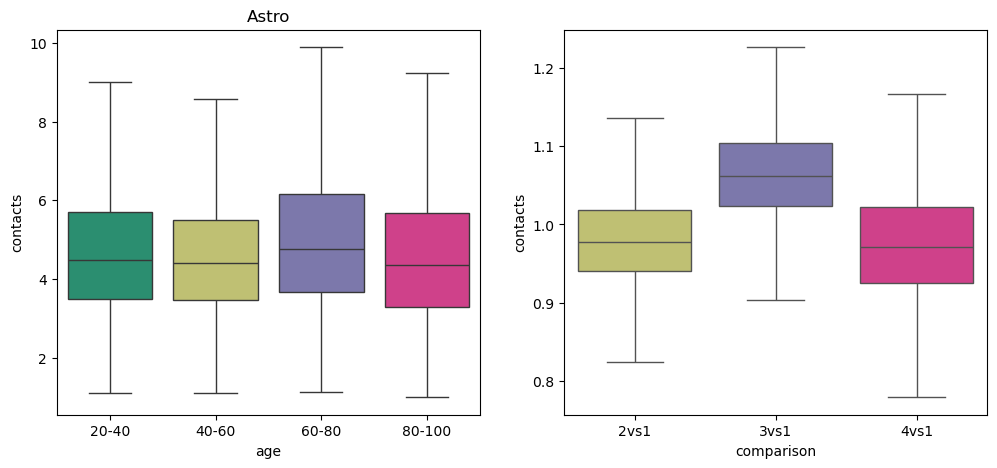

In [29]:
curr_pd_count, curr_pd_fold = summarize_intra_tad_contacts("Astro")

In [30]:
curr_pd_count["subclass"] = "Astro"
curr_pd_fold["subclass"] = "Astro"

In [31]:
pd_count_list.append(curr_pd_count)
pd_fold_list.append(curr_pd_fold)

## Micro

44776389
44840456
44772054
44711851


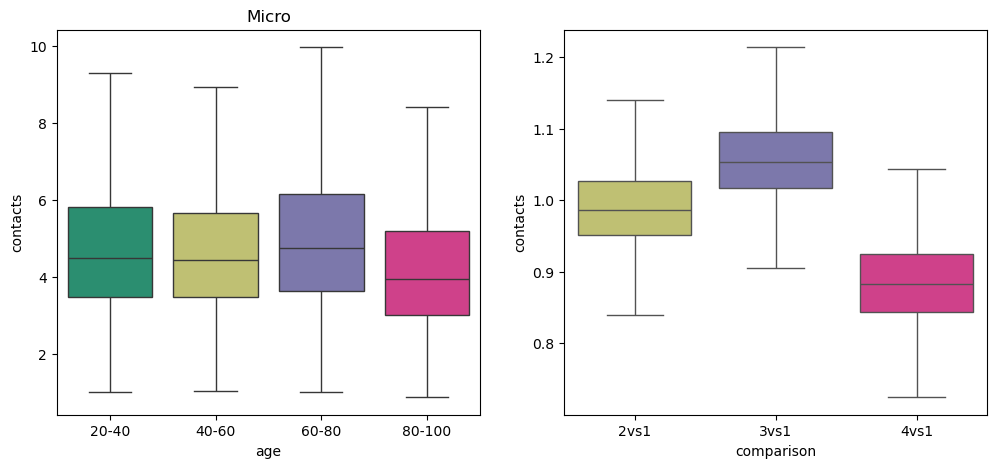

In [34]:
curr_pd_count, curr_pd_fold = summarize_intra_tad_contacts("Micro")

In [35]:
pd_count_list.append(curr_pd_count)
pd_fold_list.append(curr_pd_fold)

## Endo_VLMC

4416351
4430489
4415488
4410114


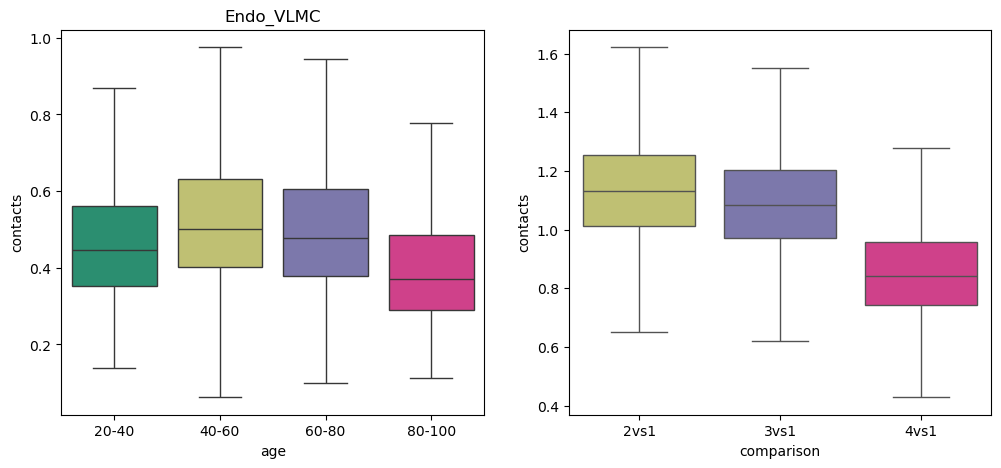

In [37]:
curr_pd_count, curr_pd_fold = summarize_intra_tad_contacts("Endo_VLMC")

In [38]:
pd_count_list.append(curr_pd_count)
pd_fold_list.append(curr_pd_fold)

## OPC

18051583
18059106
18068272
18037443


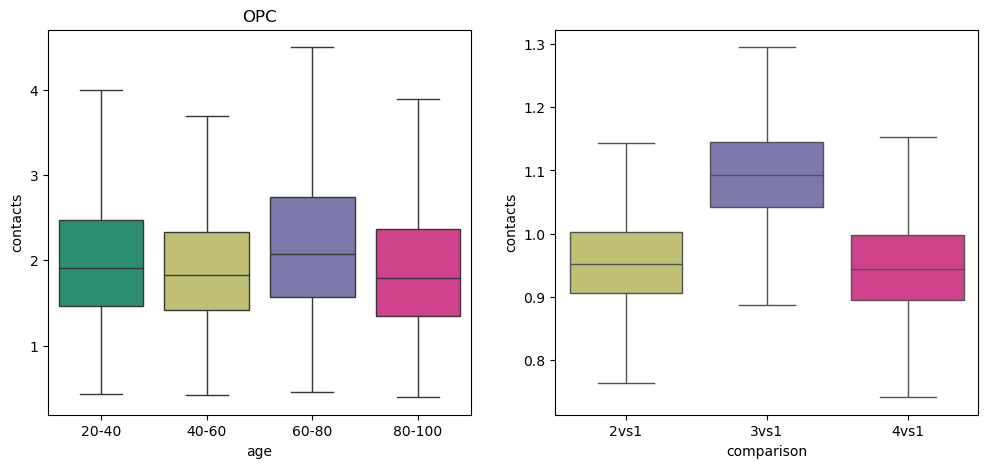

In [41]:
curr_pd_count, curr_pd_fold = summarize_intra_tad_contacts("OPC")

In [42]:
pd_count_list.append(curr_pd_count)
pd_fold_list.append(curr_pd_fold)

## ExcNeurons

30977134
31066394
31077981
31036723


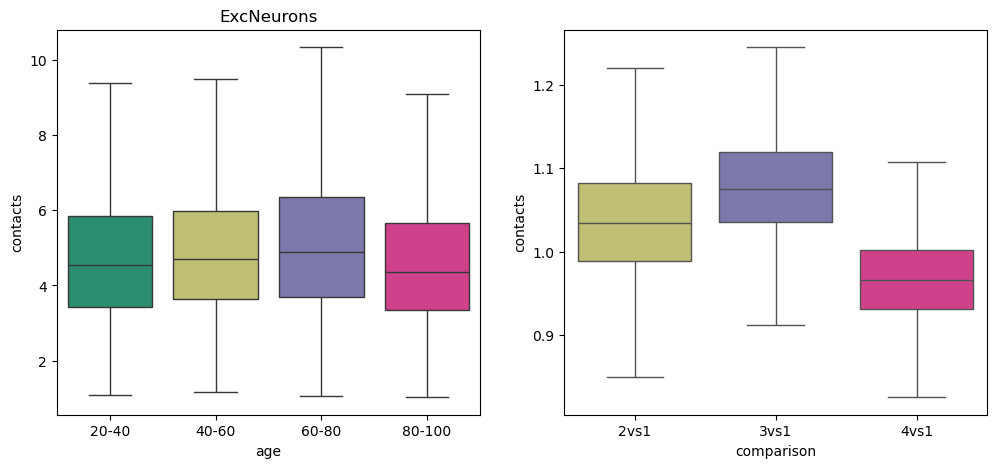

In [43]:
curr_pd_count, curr_pd_fold = summarize_intra_tad_contacts("ExcNeurons")

In [44]:
pd_count_list.append(curr_pd_count)
pd_fold_list.append(curr_pd_fold)

## InhNeurons

12998319
13032982
13015080
12989943


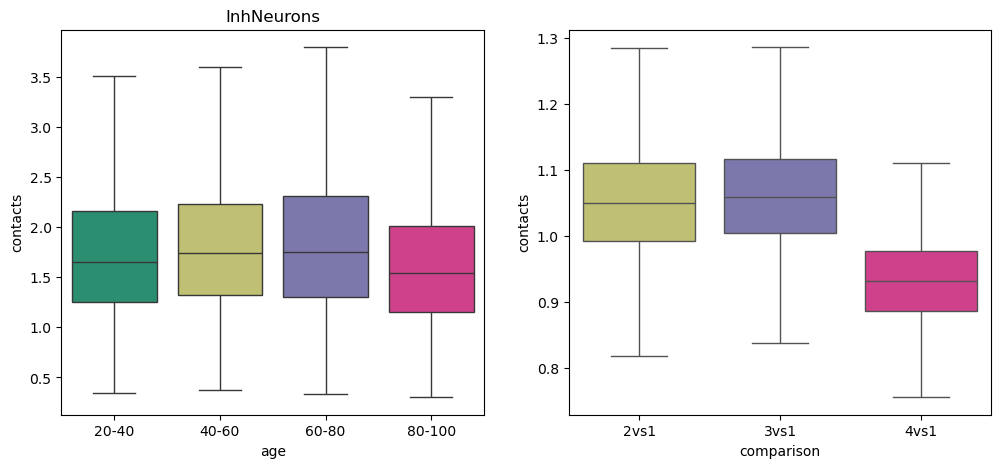

In [45]:
curr_pd_count, curr_pd_fold = summarize_intra_tad_contacts("InhNeurons")

In [46]:
pd_count_list.append(curr_pd_count)
pd_fold_list.append(curr_pd_fold)

## CA

2248815
2244462
2257044
2257684


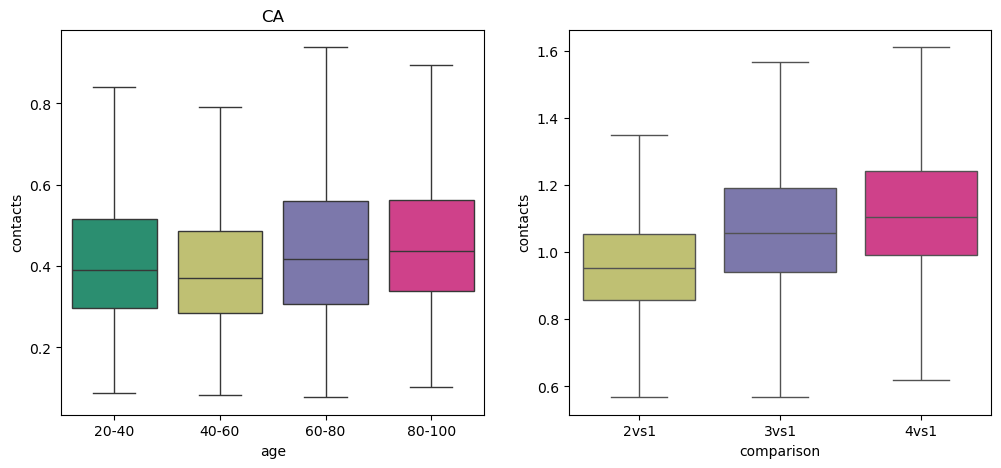

In [47]:
curr_pd_count, curr_pd_fold = summarize_intra_tad_contacts("CA")

In [48]:
pd_count_list.append(curr_pd_count)
pd_fold_list.append(curr_pd_fold)

## DG

8019335
8057340
8043218
8089907


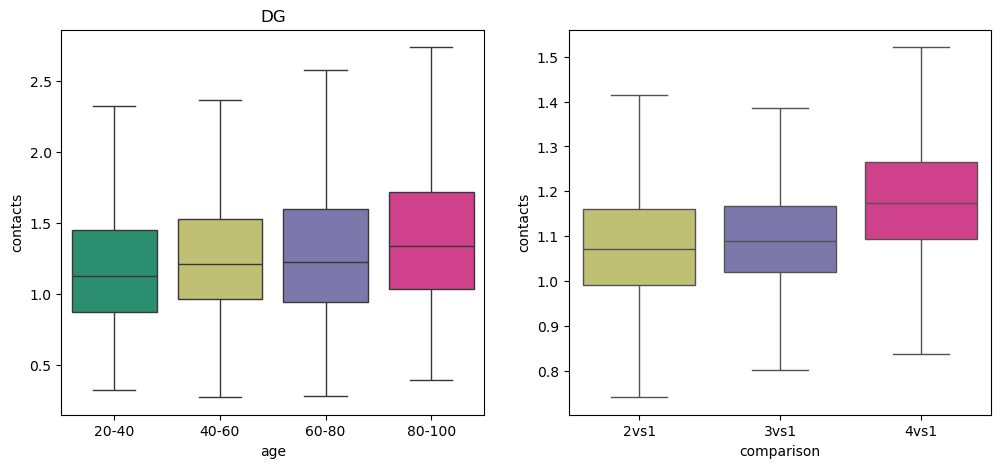

In [49]:
curr_pd_count, curr_pd_fold = summarize_intra_tad_contacts("DG")

In [50]:
pd_count_list.append(curr_pd_count)
pd_fold_list.append(curr_pd_fold)

## SUB

10704333
10729132
10739475
10711091


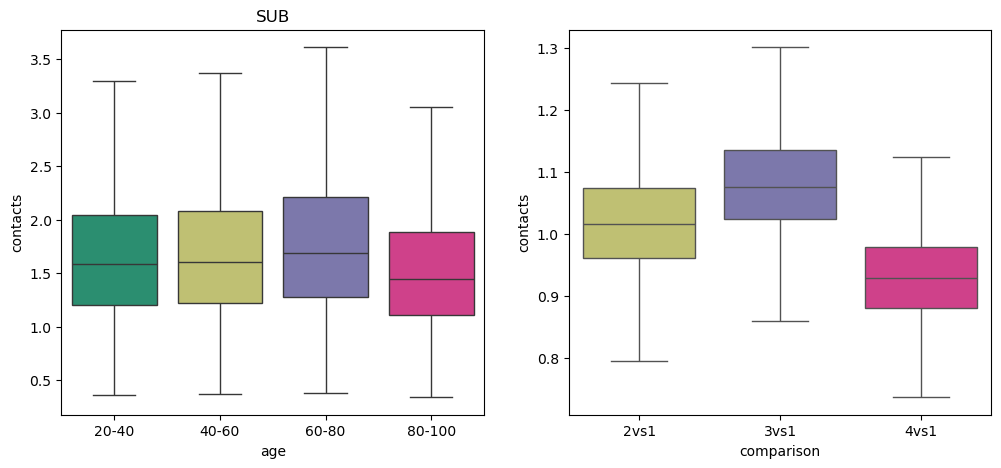

In [51]:
curr_pd_count, curr_pd_fold = summarize_intra_tad_contacts("SUB")

In [52]:
pd_count_list.append(curr_pd_count)
pd_fold_list.append(curr_pd_fold)

## NR2F2-LAMP5

2973082
2983308
2976468
2972272


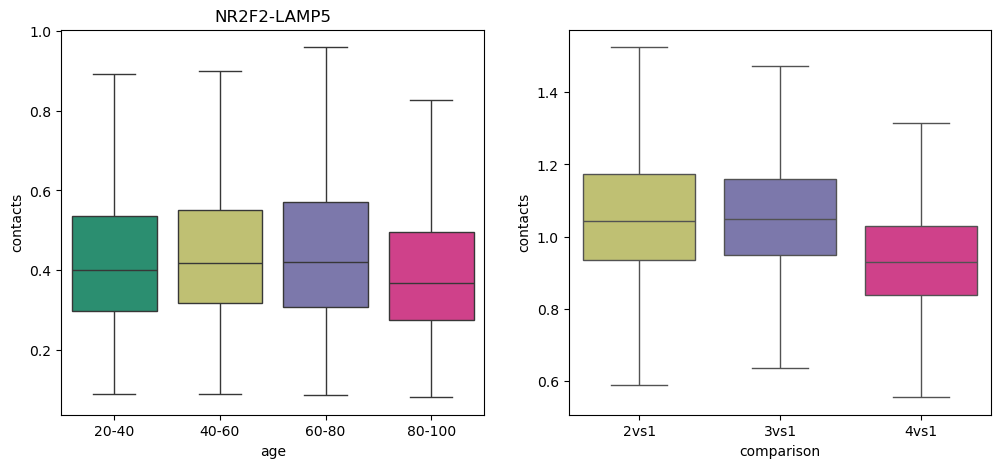

In [53]:
curr_pd_count, curr_pd_fold = summarize_intra_tad_contacts("NR2F2-LAMP5")

In [54]:
pd_count_list.append(curr_pd_count)
pd_fold_list.append(curr_pd_fold)

## PVALB

1014786
1016952
1019317
1014720


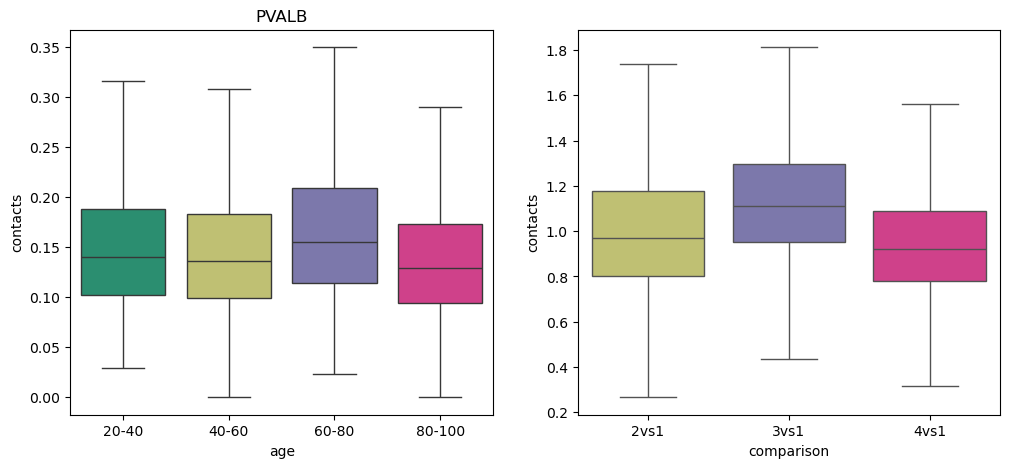

In [55]:
curr_pd_count, curr_pd_fold = summarize_intra_tad_contacts("PVALB")

In [56]:
pd_count_list.append(curr_pd_count)
pd_fold_list.append(curr_pd_fold)

## VIP

5219308
5232403
5217145
5206461


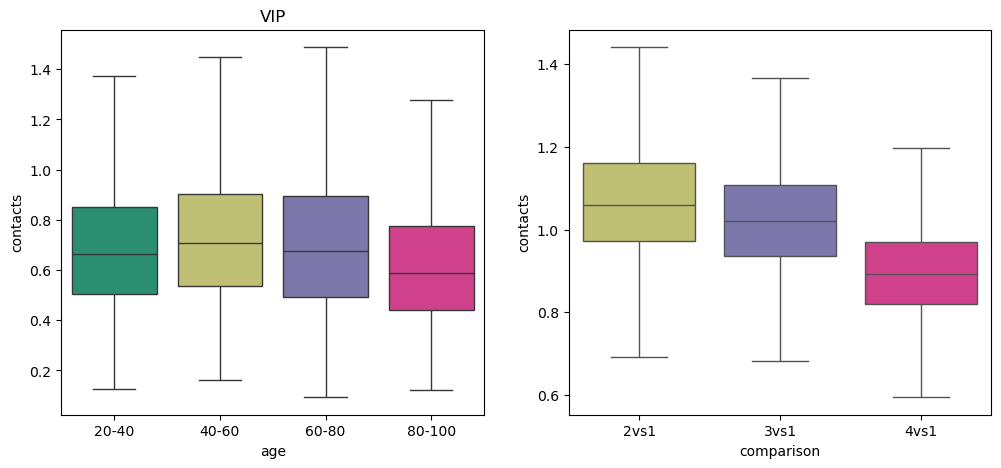

In [57]:
curr_pd_count, curr_pd_fold = summarize_intra_tad_contacts("VIP")

In [58]:
pd_count_list.append(curr_pd_count)
pd_fold_list.append(curr_pd_fold)

## SST

3789711
3800319
3793260
3792607


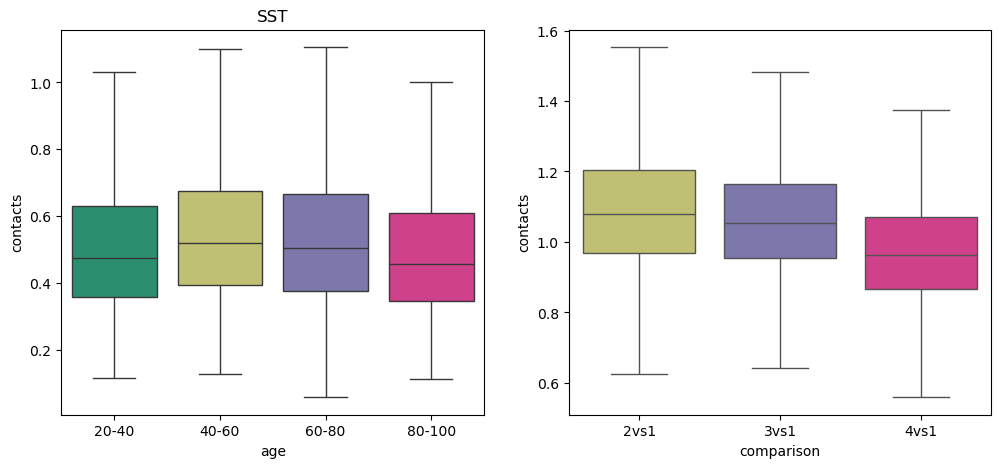

In [59]:
curr_pd_count, curr_pd_fold = summarize_intra_tad_contacts("SST")

In [60]:
pd_count_list.append(curr_pd_count)
pd_fold_list.append(curr_pd_fold)

## All plot

In [63]:
pd_count_all = pd.concat(pd_count_list, axis=0)

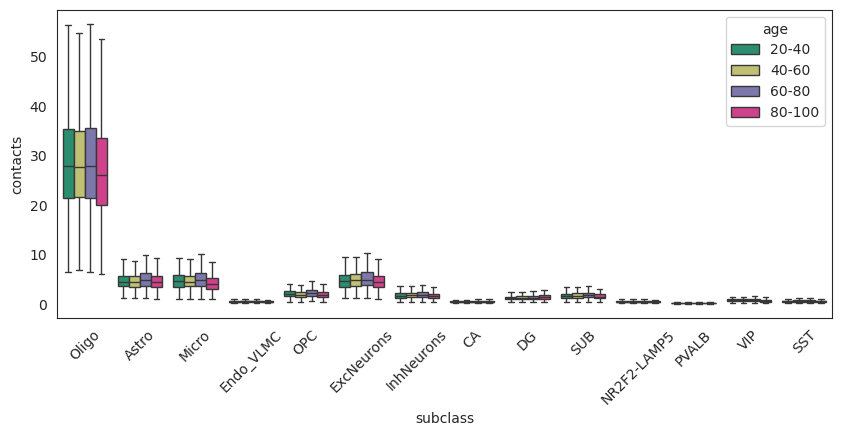

In [73]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(10)
fig.set_figheight(4)
sns.set_style("white")
sns.boxplot(
    data=pd_count_all,
    x="subclass",
    y="contacts",
    hue="age",
    ax=ax,
    palette=age_colors,
    legend=True,
    showfliers=False
)
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45);
fig.savefig(
    str(figure_dir / "intra_tad_contacts_counts.pdf"),
    format="pdf",
    bbox_inches="tight",
    dpi=200
)

In [74]:
pd_fold_all = pd.concat(pd_fold_list, axis=0)

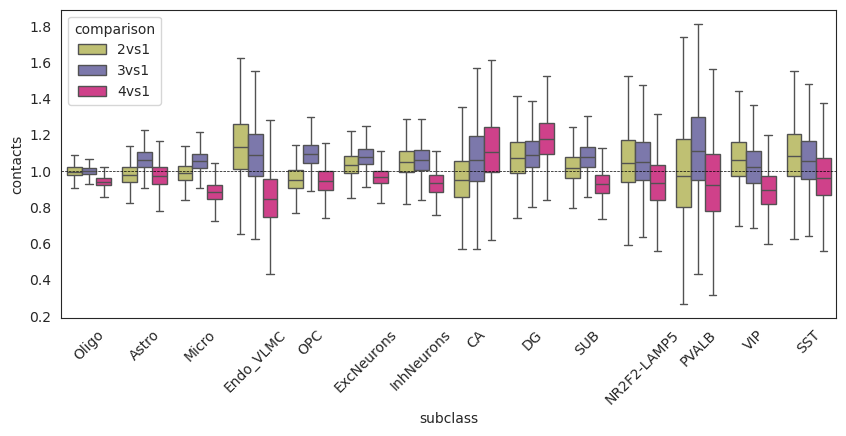

In [82]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(10)
fig.set_figheight(4)
sns.set_style("white")
sns.boxplot(
    data=pd_fold_all,
    x="subclass",
    y="contacts",
    hue="comparison",
    ax=ax,
    palette=comparison_colors,
    legend=True,
    showfliers=False
)
ax.axhline(y = 1.0, linestyle="--", color="black", linewidth=0.5)
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45);
fig.savefig(
    str(figure_dir / "intra_tad_contacts_fold_change.pdf"),
    format="pdf",
    bbox_inches="tight",
    dpi=200
)

## Microglia subtype

In [4]:
def load_datasets_subtypes(subclass, resolution=25000):
    result = dict()

    for group in ["Micro1", "Micro2"]:
        result[group] = cooler.Cooler(
            str(downsample_dir / f"{subclass}Subtypes" / f"{group}.mcool::/resolutions/{resolution}"))
    return result

In [5]:
figure_dir = Path(
    "/tscc/projects/ps-epigen/users/biy022/scmethylhic/"
    "human_hippocampus/snm3c/Combined/hic/figures/downsample_intra_TAD_contacts"
)

In [6]:
subtype_colors = {
    "Micro1": "#87B9DD",
    "Micro2": "#777ED8",
}
comparison_colors = {
    "2vs1": "#CCCD66",
}

In [7]:
def summarize_intra_tad_contacts_subtypes(subclass):
    curr_datasets = load_datasets_subtypes(subclass)
    curr_tad = pd.read_csv(
        tad_dir / f"human_aging_{subclass}_psueobulk_domain_filtered.bed",
        header=0, sep=","
    )

    curr_pd_dict = dict()
    for group in curr_datasets:
        tmp_counts = list()
        for i in range(0, curr_tad.shape[0]):
            tmp_matrix = np.triu(curr_datasets[group].matrix(balance=False).fetch(curr_tad.iloc[i]))
            tmp_counts.append(np.sum(tmp_matrix) / np.square(tmp_matrix.shape[0]))
        curr_pd_dict[group] = tmp_counts
        print(np.sum(np.triu(curr_datasets[group].matrix(balance=False)[:])))

    curr_pd = pd.DataFrame(curr_pd_dict)
    curr_pd["2vs1"] = curr_pd[f"{subclass}2"] / curr_pd[f"{subclass}1"]
    curr_pd_count = pd.melt(curr_pd.iloc[:, 0:2], var_name="subtype", value_name="contacts")
    curr_pd_fold = pd.melt(curr_pd.iloc[:, 2:], var_name="comparison", value_name="contacts")

    return curr_pd_count, curr_pd_fold

In [8]:
curr_pd_count, curr_pd_fold = summarize_intra_tad_contacts_subtypes("Micro")

137139817
136912225


In [21]:
curr_pd_count["log2_contacts"] = np.log2(curr_pd_count["contacts"] + 1)

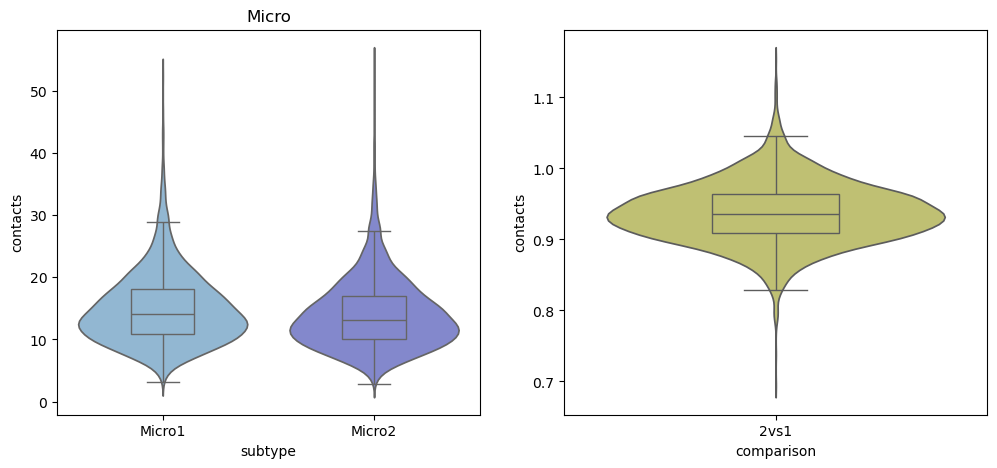

In [24]:
subclass = "Micro"
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(5)

sns.violinplot(
    data=curr_pd_count, x="subtype", y="contacts", hue="subtype", 
    ax=axs[0], palette=subtype_colors, inner=None
)
sns.boxplot(
    data=curr_pd_count, x="subtype", y="contacts", hue="subtype",
    ax=axs[0], width=0.3, palette=subtype_colors, boxprops={"zorder": 2},
    showfliers=False
)
axs[0].set_title(subclass)

sns.violinplot(
    data=curr_pd_fold, x="comparison", y="contacts", hue="comparison", 
    ax=axs[1], palette=comparison_colors, inner=None
)
sns.boxplot(
    data=curr_pd_fold, x="comparison", y="contacts", hue="comparison",
    ax=axs[1], width=0.3, palette=comparison_colors, boxprops={"zorder": 2},
    showfliers=False
)
fig.savefig(
    str(figure_dir / (f"{subclass}Subtypes" + ".pdf")),
    dpi=300,
    format="pdf"
)

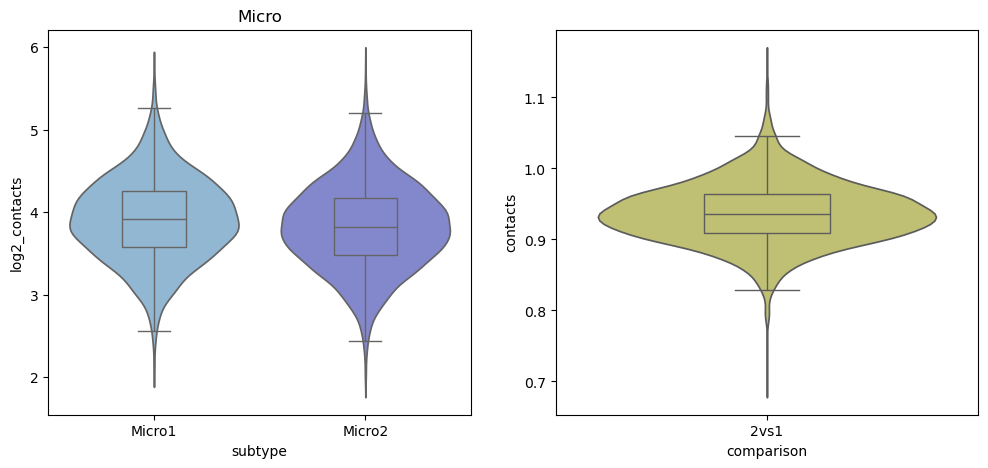

In [25]:
subclass = "Micro"
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(5)

sns.violinplot(
    data=curr_pd_count, x="subtype", y="log2_contacts", hue="subtype", 
    ax=axs[0], palette=subtype_colors, inner=None
)
sns.boxplot(
    data=curr_pd_count, x="subtype", y="log2_contacts", hue="subtype",
    ax=axs[0], width=0.3, palette=subtype_colors, boxprops={"zorder": 2},
    showfliers=False
)
axs[0].set_title(subclass)

sns.violinplot(
    data=curr_pd_fold, x="comparison", y="contacts", hue="comparison", 
    ax=axs[1], palette=comparison_colors, inner=None
)
sns.boxplot(
    data=curr_pd_fold, x="comparison", y="contacts", hue="comparison",
    ax=axs[1], width=0.3, palette=comparison_colors, boxprops={"zorder": 2},
    showfliers=False
)
fig.savefig(
    str(figure_dir / (f"{subclass}Subtypes_Log2" + ".pdf")),
    dpi=300,
    format="pdf"
)

In [27]:
from scipy.stats import mannwhitneyu

In [29]:
stat, p_value = mannwhitneyu(
    curr_pd_count.loc[curr_pd_count["subtype"] == "Micro1", "contacts"],
    curr_pd_count.loc[curr_pd_count["subtype"] == "Micro2", "contacts"],
)

In [30]:
p_value

4.787812237242699e-14

## Intra TAD ratio for Micro1 and Micro2 cells

In [1]:
import pandas as pd
import cooler
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pybedtools

In [2]:
# Meta data
meta_file = "/tscc/projects/ps-renlab2/sel041/scmethylhic/human_hippocampus/concat/human_aging_final_metadata.csv.gz"
meta_df = pd.read_csv(meta_file, header=0, index_col=1)
meta_df.drop(meta_df.columns[0], axis=1, inplace=True)

In [3]:
micro1_meta_df = meta_df.loc[meta_df["final_cluster"] == "Micro1", :]
micro2_meta_df = meta_df.loc[meta_df["final_cluster"] == "Micro2", :]

In [4]:
# TAD file
micro_TAD_file = "/tscc/projects/ps-renlab2/sel041/scmethylhic/human_hippocampus/concat/hic/celltype/human_aging_Micro_psueobulk_domain_filtered.bed"
micro_TAD_df = pd.read_csv(micro_TAD_file, header=0, sep=",")

In [5]:
# Create a bed tmp file for TAD
micro_TAD_bed = pybedtools.BedTool.from_dataframe(micro_TAD_df)

In [6]:
# Create the final table
intra_TAD_ratios = pd.DataFrame(
    np.zeros((micro1_meta_df.shape[0] + micro2_meta_df.shape[0], 3)),
    columns=["subtype", "total", "intraTAD"]
)
intra_TAD_ratios["subtype"] = "Micro1"

In [7]:
# the common file prefix
hic_prefix = Path("/tscc/projects/ps-epigen/users/biy022/scmethylhic/human_hippocampus/snm3c/")

In [8]:
counter = 0
for row in micro1_meta_df.itertuples():
    curr_file_name = hic_prefix / (row.sample + "_deep") / "hic" / "rmbkl" / (row.Index + ".contact.rmbkl.tsv.gz")
    curr_hic_df = pd.read_csv(curr_file_name, header=None, sep="\t")
    curr_hic_df_cis = curr_hic_df.loc[curr_hic_df[1] == curr_hic_df[5], :]
    curr_hic_bed = pybedtools.BedTool.from_dataframe(curr_hic_df_cis[[1,2,6]])
    tad_count = curr_hic_bed.intersect(micro_TAD_bed, wa=True, u=True, f=1.0).to_dataframe().shape[0]
    total_count = curr_hic_df.shape[0]
    intra_TAD_ratios.iloc[counter, :] = ["Micro1", tad_count, total_count]
    counter += 1

for row in micro2_meta_df.itertuples():
    curr_file_name = hic_prefix / (row.sample + "_deep") / "hic" / "rmbkl" / (row.Index + ".contact.rmbkl.tsv.gz")
    curr_hic_df = pd.read_csv(curr_file_name, header=None, sep="\t")
    curr_hic_df_cis = curr_hic_df.loc[curr_hic_df[1] == curr_hic_df[5], :]
    curr_hic_bed = pybedtools.BedTool.from_dataframe(curr_hic_df_cis[[1,2,6]])
    tad_count = curr_hic_bed.intersect(micro_TAD_bed, wa=True, u=True, f=1.0).to_dataframe().shape[0]
    total_count = curr_hic_df.shape[0]
    intra_TAD_ratios.iloc[counter, :] = ["Micro2", tad_count, total_count]
    counter += 1

In [9]:
intra_TAD_ratios.columns = ["subtype", "intraTAD", "total"]

In [10]:
intra_TAD_ratios["ratio"] = intra_TAD_ratios["intraTAD"] / intra_TAD_ratios["total"]

In [12]:
subtype_colors = {
    "Micro1": "#87B9DD",
    "Micro2": "#777ED8",
}

In [13]:
# figure save directory
figure_dir = Path("/tscc/projects/ps-epigen/users/biy022/scmethylhic/human_hippocampus/snm3c/Combined/hic/figures/")

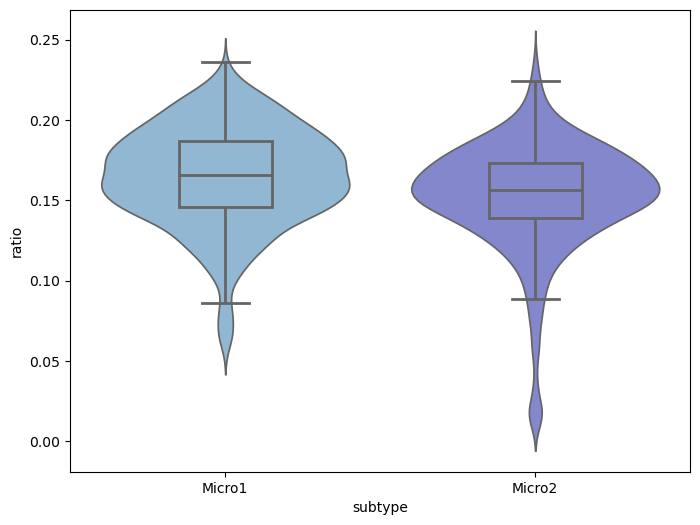

In [14]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)

sns.violinplot(
    data=intra_TAD_ratios, x="subtype", y="ratio", hue="subtype",
    ax=ax, palette=subtype_colors, inner=None
)
sns.boxplot(
    data=intra_TAD_ratios, x="subtype", y="ratio", hue="subtype",
    ax=ax, width=0.3, palette=subtype_colors, boxprops={"zorder": 2},
    showfliers=False, linewidth=2
)
fig.savefig(
    str(figure_dir / (f"MicroSubtypes_intraTADRatio_NoCisShort" + ".pdf")),
    dpi=300,
    format="pdf"
)

In [16]:
from scipy.stats import mannwhitneyu

In [17]:
stat, p_value = mannwhitneyu(
    intra_TAD_ratios.loc[intra_TAD_ratios["subtype"] == "Micro1", "ratio"],
    intra_TAD_ratios.loc[intra_TAD_ratios["subtype"] == "Micro2", "ratio"]
)

In [19]:
p_value

2.9393688457887184e-19

In [20]:
intra_TAD_ratios.to_csv(
    str(figure_dir / "intra_TAD_ratios_MicroSubtypes.csv"),
    header=True, sep=",", index=False
)